### Introduction
India is one of the fastest growing economy in the world. There is a lot of innovative startups coming up in the region and a lot of funding for these startups as well.Lets Understand some of the most Interesting Patterns of Funding and Startups.

* **How Does the Funding Ecosystem changes with respect to Time?**
* **What is the General Amount that Startups get in India?**
* **Which Kind of Industries are more preferred for Startups?**
* **Does Location also play a role, In determining the Growth of a Startup?**
* **Who plays the main role in Indian Startups Ecosystem?**
* **What are the different Types of Funding for Startups?**

## Lets Install the Libraries

In [1]:
# for mathematical operations
import numpy as np 

# for dataframe operations
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# lets select  a background style
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (16, 7)

# for interactivity
import ipywidgets as widgets
from ipywidgets import interact
from ipywidgets import interact_manual

# lets import warnings module
import warnings
warnings.filterwarnings('ignore')

## Read the data

In [2]:
# lets import the data
data = pd.read_csv("startup_funding.csv")
data.head(10)

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN
5,6,13/01/2020,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,"90,00,000",NaN
6,7,10/01/2020,Zomato,Hospitality,Online Food Delivery Platform,Gurgaon,Ant Financial,Private Equity Round,"15,00,00,000",NaN
7,8,12/12/2019,Ecozen,Technology,Agritech,Pune,Sathguru Catalyzer Advisors,Series A,"60,00,000",NaN
8,9,06/12/2019,CarDekho,E-Commerce,Automobile,Gurgaon,Ping An Global Voyager Fund,Series D,"7,00,00,000",NaN
9,10,03/12/2019,Dhruva Space,Aerospace,Satellite Communication,Bengaluru,"Mumbai Angels, Ravikanth Reddy",Seed,"5,00,00,000",NaN


In [3]:
# change the names of the columns inside the data
data.columns = ["SNo", "Date", "StartupName", "IndustryVertical", "SubVertical",
                        "City", "InvestorsName", "InvestmentType", "AmountInUSD", "Remarks"]
data.sample(3)

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Remarks
3043,3044,31/01/2015,couponmachine.in,NaN,NaN,NaN,UK based Group of Angel Investors,Seed Funding,"1,40,000",NaN
1729,1730,26/05/2016,Cleartax,Consumer Internet,Online Income Tax Filing platform,Bangalore,"FF Angel, Sequoia Capital",Private Equity,"20,00,000",NaN
2516,2517,12/08/2015,Scripbox,Mutual Fund Investing platform,NaN,Bangalore,"Accel Partners, Deep Kalra, Rajesh Magow, Mohi...",Private Equity,"25,00,000",Series A


In [4]:
data.drop(columns=['SNo','Remarks'],axis=1,inplace=True)
data.head(3)

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"


In [5]:
# Clean the strings
def clean_string(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0", "")

# Apply the function to clean the data
for col in ["StartupName", "IndustryVertical", "SubVertical", "City", 
            "InvestorsName", "InvestmentType", "AmountInUSD"]:
    data[col] = data[col].apply(lambda x: clean_string(x))
    
# Check the data
data.head()

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
0,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [6]:
# Check the shape of the data
print("Size of data", data.shape)

Size of data (3044, 8)


- We have details about 3044 funding deals in this data 

## Data Cleaning

In [7]:
# Calculate the total missing values in the data
total = data.isnull().sum().sort_values(ascending = False)
total

AmountInUSD         0
InvestmentType      0
InvestorsName       0
City                0
SubVertical         0
IndustryVertical    0
StartupName         0
Date                0
dtype: int64

In [8]:
# Calculate the percentage of missing values in the data
percent = ((data.isnull().sum()/data.isnull().count())*100).sort_values(ascending=False)
percent

AmountInUSD         0.0
InvestmentType      0.0
InvestorsName       0.0
City                0.0
SubVertical         0.0
IndustryVertical    0.0
StartupName         0.0
Date                0.0
dtype: float64

In [9]:
#Create a new column with the Total number of missing data and percentage
missing_data = pd.concat([total,percent],axis=1,keys=['Total','Percent %'])
missing_data

,Total,Percent %
AmountInUSD,0,0.0
InvestmentType,0,0.0
InvestorsName,0,0.0
City,0,0.0
SubVertical,0,0.0
IndustryVertical,0,0.0
StartupName,0,0.0
Date,0,0.0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              3044 non-null   object
 1   StartupName       3044 non-null   object
 2   IndustryVertical  3044 non-null   object
 3   SubVertical       3044 non-null   object
 4   City              3044 non-null   object
 5   InvestorsName     3044 non-null   object
 6   InvestmentType    3044 non-null   object
 7   AmountInUSD       3044 non-null   object
dtypes: object(8)
memory usage: 190.4+ KB


In [11]:
# Convert the amount column into numerical, so that we can analyze the values inside it
def clean_amount(x):
    x = ''.join([c for c in str(x) if c in ['0','1','2','3''4','5','6','7''8','9']])
    x = str(x).replace(",","").replace("+","")
    x = str(x).lower().replace("undisclosed","")
    x = str(x).lower().replace("n/a","")
    if x == '':
        x = '-999'
    return x

#apply this function on the Amountin USd Column
data['AmountInUSD'] = data['AmountInUSD'].apply(lambda x:float(clean_amount(x)))
data['AmountInUSD'] 

0       200000000.0
1               9.0
2            1560.0
3               0.0
4          100000.0
           ...     
3039       500000.0
3040        25000.0
3041      1500000.0
3042         -999.0
3043        10000.0
Name: AmountInUSD, Length: 3044, dtype: float64

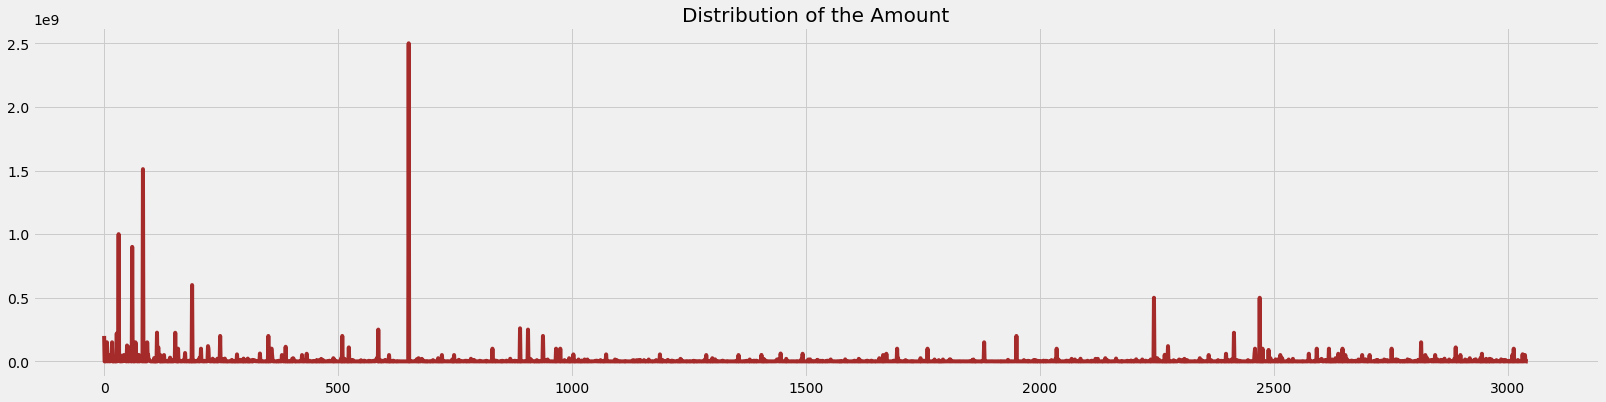

In [12]:
plt.figure(figsize=(25,6))
data['AmountInUSD'].plot(kind='line',color='brown')
plt.title('Distribution of the Amount',fontsize=20)
plt.show()

In [13]:
data.shape

(3044, 8)

In [14]:
print(data['Date'].unique())

['09/01/2020' '13/01/2020' '02/01/2020' ... '29/01/2015' '30/01/2015'
 '31/01/2015']


In [15]:
#Dates are not in the same format
data.loc[data['Date']=='12/05.2015']

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD
2775,12/05.2015,Mobiefit,Mobile Fitness App,nan,Goa,Prototyze,Seed Funding,-999.0
2776,12/05.2015,Plancess,Online Education Platform,nan,Mumbai,"Rajendra Gogri, Chandrakant Gogri",Seed Funding,2000000.0


In [16]:
## Clean the dates

data['Date'][data['Date']=='12/05.2015'] = '12/05/2015'
data['Date'][data['Date']=='13/04.2015'] = '13/04/2015'
data['Date'][data['Date']=='15/01.2015'] = '15/01/2015'
data['Date'][data['Date']=='22/01//2015'] = '22/01/2015'
data['Date'][data['Date']=='05/072018'] = '05/07/2018'
data['Date'][data['Date']=='01/07/015'] = '01/07/2015'
data['Date'][data['Date']=='\\\\xc2\\\\xa010/7/2015'] = '10/07/2015'

In [17]:
data['Date'].sample(25)

2773    12/05/2015
1112    30/01/2017
72      09/07/2019
1718    19/05/2016
2699    09/06/2015
2590    07/07/2015
2493    06/08/2015
177     13/08/2018
1798    21/04/2016
390     28/02/2018
102     12/04/2019
2028    08/01/2016
2045    13/01/2016
225     01/06/2018
2988    27/02/2015
2058    19/01/2016
266     21/05/2018
2106    30/01/2016
2250    19/11/2015
1124    06/12/2016
51      13/08/2019
1353    07/09/2016
1960    16/02/2016
1592    10/06/2016
1050    06/01/2017
Name: Date, dtype: object

## How Does the Funding Ecosystem changes with respect to Time?

In [18]:
data['Date'] = pd.to_datetime(data['Date'])
(data['Date']).dtypes

dtype('<M8[ns]')

In [19]:
#extract the year from Date column
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [20]:
print(data['Year'].max())
print(data['Year'].min())

2020
2015


In [21]:
#Extract the new column fron Original Date Column
data['YearMonth'] = data['Year']*100 + data['Month']
data['YearMonth']

0       202009
1       202001
2       202009
3       202002
4       202002
         ...  
3039    201501
3040    201501
3041    201501
3042    201501
3043    201501
Name: YearMonth, Length: 3044, dtype: int64

In [22]:
 data['YearMonth'].value_counts().sort_values(ascending=False).head(10)

201604    102
201601    100
201509     98
201608     95
201507     94
201606     93
201511     89
201503     85
201508     83
201612     82
Name: YearMonth, dtype: int64

No.of fundings per month in decreasing order
 201604    102
201601    100
201509     98
201608     95
201507     94
201606     93
201511     89
201503     85
201508     83
201612     82
Name: YearMonth, dtype: int64


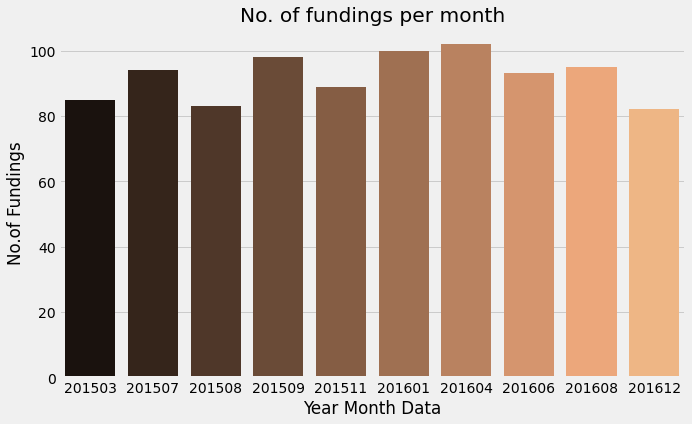

In [23]:
Top_10_fundings = data['YearMonth'].value_counts().sort_values(ascending=False)[:10]
print("No.of fundings per month in decreasing order\n",Top_10_fundings )

plt.figure(figsize=(10,6))
sns.barplot(Top_10_fundings.index, Top_10_fundings.values, palette = 'copper')
plt.title("No. of fundings per month")
plt.xlabel("Year Month Data")
plt.ylabel("No.of Fundings")
plt.show()

-Maximum fundings were 102 in April 2016

## What is the General Amount that Startups get in India?

In [24]:
#check the Maximum funding of a startup
print("Maximum amount for the funding is: ",data['AmountInUSD'].dropna().sort_values().max())

Maximum amount for the funding is:  2500000000.0


In [25]:
# check which companies got the maximum fundings
data.loc[data['AmountInUSD']==2500000000]

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Year,Month,YearMonth
651,2017-11-08,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,2017,11,201711


- Flipkart had grabbed the maximum funding of 2500000000 (i.e 2 billion 500 million) in 2017 through Private Equity

In [26]:
# lets check the startups with more than 50crore+ funding

@interact
def check(column = 'AmountInUSD', x = 500000000): # 50 crore funding of startups
    return data[data[column] > x].sort_values(by = 'AmountInUSD', ascending = False)

interactive(children=(Text(value='AmountInUSD', description='column'), IntSlider(value=500000000, description=…

- Flipkart,True North,Pratilipi,Rapido Bike Taxi and Paytm,etc. had got more than 50 crores Fundings

In [27]:
#check the Average funding of a startup
print("Average amount for the funding is: ",data['AmountInUSD'].dropna().sort_values().mean())

Average amount for the funding is:  7353897.955978975


In [28]:
# lets check out different ventures of Paytm
data[data.StartupName == 'Paytm']

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Year,Month,YearMonth
31,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09,2019,11,201911
251,2018-06-26,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,9.500000e+05,2018,6,201806
830,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.000000e+08,2017,5,201705
1493,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07,2016,8,201608
2459,2015-09-29,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.000000e+07,2015,9,201509
2890,2015-03-13,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02,2015,3,201503
2948,2015-05-02,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02,2015,5,201505


In [29]:
# lets check out different ventures of Flipkart
data[data.StartupName == 'Flipkart']

,Date,StartupName,IndustryVertical,SubVertical,City,InvestorsName,InvestmentType,AmountInUSD,Year,Month,YearMonth
651,2017-11-08,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09,2017,11,201711
773,2017-06-26,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,1.000000e+06,2017,6,201706
966,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.000000e+08,2017,3,201703
1032,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,0.000000e+00,2017,2,201702
2689,2015-04-06,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+07,2015,4,201504


-  Flipkart is in ecommerce vertical

In [30]:
# lets check the minimum funding in a startup
print("Minimum funding to a Startups is : ", data["AmountInUSD"].dropna().sort_values().min())

Minimum funding to a Startups is :  -999.0


In [31]:
# lets check the startups with least funding
data[['AmountInUSD','StartupName']].sort_values(by = 'AmountInUSD', ascending = True).head(5)

,AmountInUSD,StartupName
1379,-999.0,Liqvid
1129,-999.0,Tailslife
1855,-999.0,Yana
674,-999.0,Fieldassist
1128,-999.0,BookEventz


In [32]:
data[data['AmountInUSD'] == -999.0].shape

(971, 11)

In [33]:
# Average Funding
print("On Average indian startups got funding of : ", data["AmountInUSD"].dropna().sort_values().mean())

On Average indian startups got funding of :  7353897.955978975


Total startups funded :  2457
Ola Cabs     8
Swiggy       8
Paytm        7
Medinfi      6
Nykaa        6
UrbanClap    6
NoBroker     6
Meesho       6
Grofers      5
Moglix       5
Name: StartupName, dtype: int64


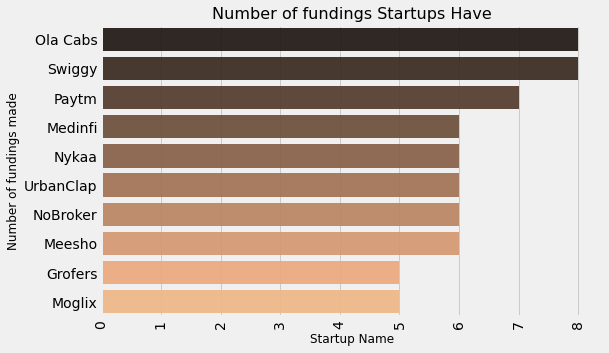

In [34]:
# lets check the no. of funding each startsup got

print("Total startups funded : ", len(data["StartupName"].unique()))
print(data["StartupName"].value_counts().head(10))
startupname = data['StartupName'].value_counts().head(10)

# lets plot the data
plt.figure(figsize=(8,5))
sns.barplot(y = startupname.index, x = startupname.values, alpha=0.9, palette = 'copper')
plt.xticks(rotation='vertical')
plt.xlabel('Startup Name', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Number of fundings Startups Have", fontsize=16)
plt.show()

## Which Kind of Industries are more preferred for Startups?

Consumer Internet      941
Technology             478
eCommerce              186
Consumer Technology    172
Healthcare              70
Finance                 62
ECommerce               61
Logistics               32
E-Commerce              29
Education               24
Name: IndustryVertical, dtype: int64


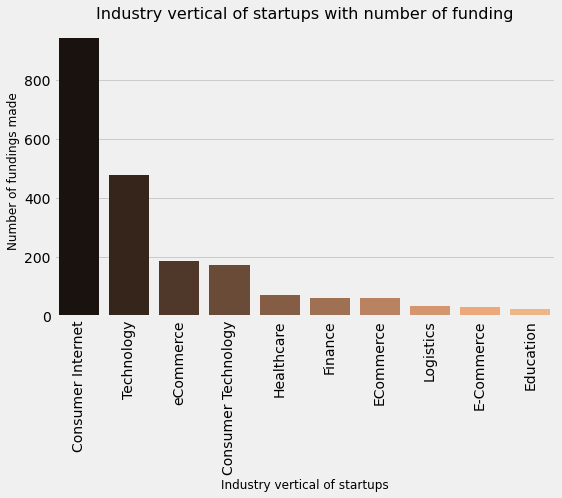

In [35]:
# lets analyze the Industry of the Startups

# data cleaning
data['IndustryVertical'] = data['IndustryVertical'].replace('nan', 'Consumer Technology')

industry = data['IndustryVertical'].value_counts().head(10)
print(industry)

# lets plot the data
plt.figure(figsize=(8,5))
sns.barplot(industry.index, industry.values, palette = 'copper')
plt.xticks(rotation='vertical')
plt.xlabel('Industry vertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Industry vertical of startups with number of funding", fontsize=16)
plt.show()

Online Lending Platform          11
Online Pharmacy                  10
Food Delivery Platform            8
Online Learning Platform          5
Online Lending                    5
Education                         5
Online lending platform           5
Online Education Platform         5
Online Food Delivery              4
Non-Banking Financial Company     4
Online Gifting platform           3
Agri-tech                         3
SaaS                              3
Logistics                         3
E-learning                        3
Online learning platform          3
Online Food Delivery Platform     3
Online Furniture Store            3
Fitness Mobile App                3
Online Insurance Platform         3
Name: SubVertical, dtype: int64


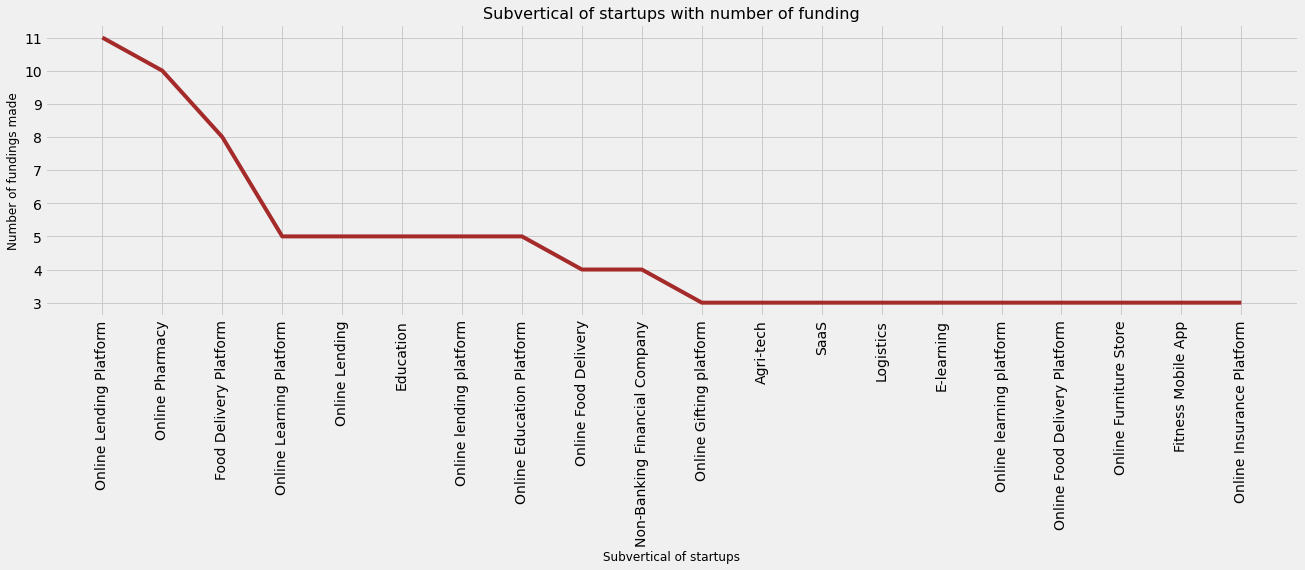

In [36]:
# lets analyze the sub vertical industries

industry = data['SubVertical'].value_counts()[1:].head(20)
print(industry)

# lets plot the data
plt.figure(figsize=(20,5))
sns.lineplot(industry.index, industry.values, color = 'brown')
plt.xticks(rotation='vertical')
plt.xlabel('Subvertical of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Subvertical of startups with number of funding", fontsize=16)
plt.show()

## Does Location also play a role in determining the Growth of a Startup?

Bangalore    1022
Mumbai        568
New Delhi     424
Gurgaon       291
Pune          105
Hyderabad      99
Chennai        97
Noida          93
Gurugram       50
Ahmedabad      38
Name: City, dtype: int64


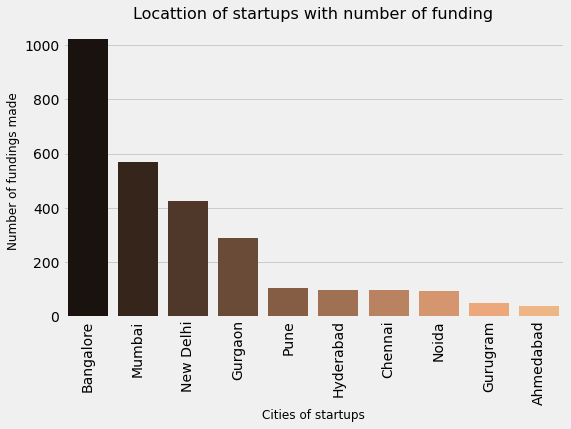

In [37]:
# analyze the effect of Cities on a Startup

# lets clean the data for better analysis
data['City'] = data['City'].replace(('Bengaluru', 'nan'),('Bangalore', 'Bangalore'))

city = data['City'].value_counts().head(10)
print(city)

# lets plot the data
plt.figure(figsize=(8,5))
sns.barplot(city.index, city.values, palette = 'copper')
plt.xticks(rotation='vertical')
plt.xlabel('Cities of startups', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Locattion of startups with number of funding", fontsize=16)
plt.show()

- Maximum no.of startups are in Bengalore, followed by Mumbai,New Delhi,Gurgaon and Pune

## Who plays the main role in Indian Startups Ecosystem?

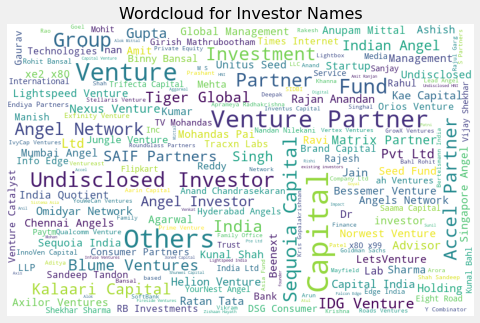

In [38]:
from wordcloud import WordCloud

names = data["InvestorsName"][~pd.isnull(data["InvestorsName"])]
wordcloud = WordCloud(max_font_size=50, width=800, height=500, background_color = 'white').generate(' '.join(names))
plt.figure(figsize=(8,5))
plt.imshow(wordcloud)
plt.title("Wordcloud for Investor Names", fontsize=16)
plt.axis("off")
plt.show()

Undisclosed Investors       136
Ratan Tata                   25
Indian Angel Network         24
Kalaari Capital              16
Group of Angel Investors     15
Sequoia Capital              15
Accel Partners               12
Venture Catalysts            11
Brand Capital                11
SAIF Partners                10
Name: InvestorsName, dtype: int64


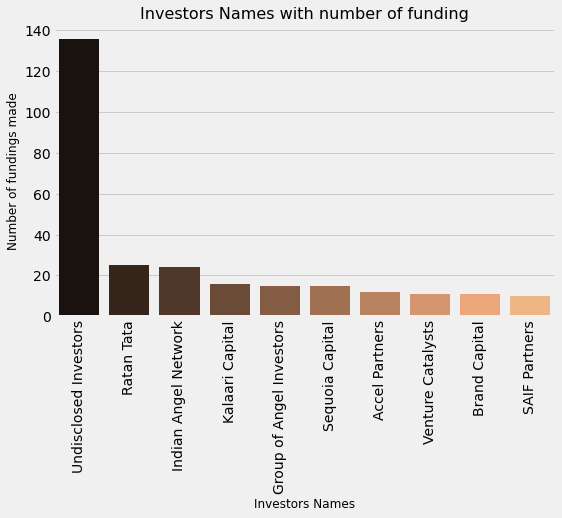

In [39]:
# lets analyze the investors on startups

# lets clean the dataset
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed Investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'undisclosed investors'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed Investor'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'Undisclosed'] = 'Undisclosed Investors'
data['InvestorsName'][data['InvestorsName'] == 'nan'] = 'Undisclosed Investors'

# lets check the value counts
investors = data['InvestorsName'].value_counts().head(10)
print(investors)

# lets plot the data
plt.figure(figsize=(8,5))
sns.barplot(investors.index, investors.values, palette = 'copper')
plt.xticks(rotation='vertical')
plt.xlabel('Investors Names', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investors Names with number of funding", fontsize=16)
plt.show()

## What are the different Types of Funding for Startups?

Private Equity          1356
Seed Funding            1355
Seed/ Angel Funding       60
Seed / Angel Funding      47
Seed\\nFunding            30
Debt Funding              25
Series A                  24
Seed/Angel Funding        23
Series B                  20
Series C                  14
Name: InvestmentType, dtype: int64


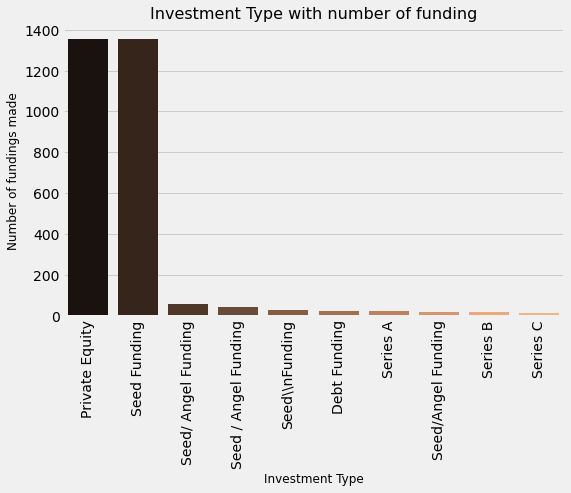

In [40]:
# lets analyze the investment
investment = data['InvestmentType'].value_counts().head(10)
print(investment)

# lets clean the dataset
data['InvestmentType'][data['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Seed\\nFunding'] = 'Seed Funding'
data['InvestmentType'][data['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'
data['InvestmentType'][data['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'

# lets plot the data
plt.figure(figsize=(8,5))
sns.barplot(investment.index, investment.values, palette = 'copper')
plt.xticks(rotation='vertical')
plt.xlabel('Investment Type', fontsize=12)
plt.ylabel('Number of fundings made', fontsize=12)
plt.title("Investment Type with number of funding", fontsize=16)
plt.show()